## Importing Libraries

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Data Pre-Processing

### Training Image Preprocessing

In [30]:
tf.debugging.set_log_device_placement(True)

In [31]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 70295 files belonging to 38 classes.


### Validation Image Preprocessing

In [32]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 17572 files belonging to 38 classes.


In [33]:
training_set

<BatchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 38), dtype=tf.float32, name=None))>

In [34]:
for x,y in training_set:
    print(x,x.shape)
    print(y,y.shape)
    break

tf.Tensor(
[[[[156.5  147.5  150.5 ]
   [152.5  143.5  146.5 ]
   [150.25 141.25 144.25]
   ...
   [107.    95.    95.  ]
   [105.25  93.25  93.25]
   [111.25  99.25  99.25]]

  [[155.   146.   149.  ]
   [152.75 143.75 146.75]
   [150.5  141.5  144.5 ]
   ...
   [111.5   99.5   99.5 ]
   [111.    99.    99.  ]
   [113.5  101.5  101.5 ]]

  [[156.   147.   150.  ]
   [155.   146.   149.  ]
   [152.75 143.75 146.75]
   ...
   [112.5  100.5  100.5 ]
   [114.75 102.75 102.75]
   [117.5  105.5  105.5 ]]

  ...

  [[149.5  136.5  143.5 ]
   [148.   135.   142.  ]
   [152.5  139.5  146.5 ]
   ...
   [145.25 127.25 127.25]
   [147.   129.   129.  ]
   [152.   134.   134.  ]]

  [[152.75 139.75 146.75]
   [155.5  142.5  149.5 ]
   [149.   136.   143.  ]
   ...
   [138.25 120.25 120.25]
   [147.5  129.5  129.5 ]
   [137.25 119.25 119.25]]

  [[154.25 141.25 148.25]
   [153.75 140.75 147.75]
   [155.5  142.5  149.5 ]
   ...
   [118.25 100.25 100.25]
   [110.5   92.5   92.5 ]
   [113.75  95.75  9

### To avoid overshooting
1. Choose small learning rate default 0.001 here we have taken 0.00012. 
There may be chance of underfitting so increase number of neuron.
3. 
Add more Convolutional Layer to extract more feature from images there may be possibilty that model unable to capture relevant feature or model is confusing due to lack of feature so feed with more feature

## Building Model

In [35]:
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout
from tensorflow.keras.models import Sequential

In [36]:
model = Sequential()

### Building Convolution Layer

In [37]:
model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
model.add(Conv2D(filters=32,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [38]:
model.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
model.add(Conv2D(filters=64,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [39]:
model.add(Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=128,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [40]:
model.add(Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=256,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [41]:
model.add(Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=512,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [42]:
#Here, 25% of the input units will be randomly set to 0 during each training epoch.
model.add(Dropout(0.25))

In [43]:
model.add(Flatten())

In [44]:
model.add(Dense(units=1500, activation='relu'))

In [45]:
model.add(Dropout(0.40)) #to avoid overfitting

### Output Layer

In [46]:
model.add(Dense(units=38,activation='softmax'))

### Compiling Model

In [47]:
model.compile(optimizer=tf.keras.optimizers.legacy.Adam(learning_rate=0.0001), 
              loss='categorical_crossentropy', metrics=['accuracy'])

In [48]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 128, 128, 32)      896       
                                                                 
 conv2d_19 (Conv2D)          (None, 126, 126, 32)      9248      
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 63, 63, 32)       0         
 2D)                                                             
                                                                 
 conv2d_20 (Conv2D)          (None, 63, 63, 64)        18496     
                                                                 
 conv2d_21 (Conv2D)          (None, 61, 61, 64)        36928     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 30, 30, 64)       0         
 g2D)                                                 

In [49]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  0


### Model Trainig

In [51]:
training_history=model.fit(x=training_set, validation_data=validation_set, epochs=10)

Epoch 1/10
2197/2197 [==============================] - 1601s 729ms/step - loss: 1.2954 - accuracy: 0.6161 - val_loss: 0.6608 - val_accuracy: 0.7948
Epoch 2/10
2197/2197 [==============================] - 1586s 722ms/step - loss: 0.4368 - accuracy: 0.8607 - val_loss: 0.2845 - val_accuracy: 0.9085
Epoch 3/10
2197/2197 [==============================] - 1544s 703ms/step - loss: 0.2678 - accuracy: 0.9141 - val_loss: 0.1986 - val_accuracy: 0.9345
Epoch 4/10
2197/2197 [==============================] - 1548s 704ms/step - loss: 0.1844 - accuracy: 0.9399 - val_loss: 0.2041 - val_accuracy: 0.9351
Epoch 5/10
2197/2197 [==============================] - 1576s 717ms/step - loss: 0.1352 - accuracy: 0.9557 - val_loss: 0.1111 - val_accuracy: 0.9641
Epoch 6/10
2197/2197 [==============================] - 1538s 700ms/step - loss: 0.1076 - accuracy: 0.9648 - val_loss: 0.1449 - val_accuracy: 0.9545
Epoch 7/10
2197/2197 [==============================] - 1538s 700ms/step - loss: 0.0852 - accuracy: 0.9726

## Model Evaluation

In [52]:
#Model evaluation on training set
train_loss, train_acc = model.evaluate(training_set)

2197/2197 [==============================] - 318s 145ms/step - loss: 0.0194 - accuracy: 0.9942


In [53]:
print(train_loss, train_acc)

0.01944810152053833 0.9941674470901489


In [54]:
#Model on Validation set
val_loss,val_acc = model.evaluate(validation_set)

550/550 [==============================] - 76s 139ms/step - loss: 0.1018 - accuracy: 0.9689


In [55]:
print(val_loss, val_acc)

0.10176079720258713 0.9689278602600098


### Saving Model

In [56]:
model.save("trained_model.keras")

In [57]:
training_history.history

{'loss': [1.2953797578811646,
  0.4368441104888916,
  0.2677812874317169,
  0.18442149460315704,
  0.1351628452539444,
  0.10757848620414734,
  0.08522313833236694,
  0.07505925744771957,
  0.061143189668655396,
  0.05682474002242088],
 'accuracy': [0.6160893440246582,
  0.8606728911399841,
  0.9140763878822327,
  0.9398819208145142,
  0.9557294249534607,
  0.9647769927978516,
  0.9725584983825684,
  0.9755459427833557,
  0.9808948040008545,
  0.9815776348114014],
 'val_loss': [0.6608004570007324,
  0.28453975915908813,
  0.19863899052143097,
  0.20405946671962738,
  0.11112537980079651,
  0.1449037790298462,
  0.14108584821224213,
  0.0986117422580719,
  0.0868479534983635,
  0.10176081955432892],
 'val_accuracy': [0.7948440909385681,
  0.908490777015686,
  0.9344980716705322,
  0.9351240396499634,
  0.9640905857086182,
  0.9545299410820007,
  0.9539608359336853,
  0.9696107506752014,
  0.9756999611854553,
  0.9689278602600098]}

In [58]:
#Recording History in json
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)

In [59]:
training_history.history['accuracy']

[0.6160893440246582,
 0.8606728911399841,
 0.9140763878822327,
 0.9398819208145142,
 0.9557294249534607,
 0.9647769927978516,
 0.9725584983825684,
 0.9755459427833557,
 0.9808948040008545,
 0.9815776348114014]

## Accuracy Visualization

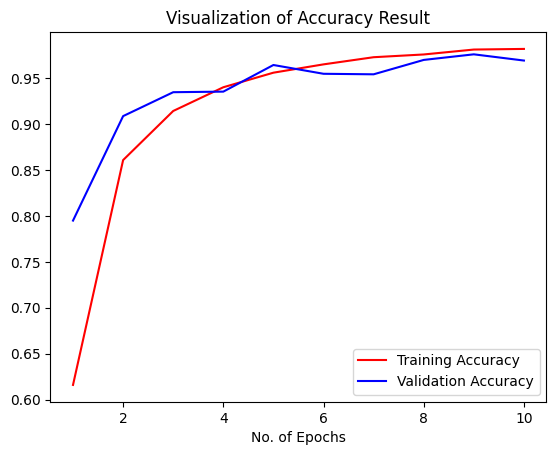

In [60]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()

### Some other metrics for model evaluation

In [61]:
class_name=validation_set.class_names
class_name

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [62]:
test_set=tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 17572 files belonging to 38 classes.


In [63]:
y_pred=model.predict(test_set)
y_pred,y_pred.shape

550/550 [==============================] - 73s 132ms/step


(array([[9.9999982e-01, 6.0815963e-11, 1.5149396e-13, ..., 3.8163760e-16,
         1.0318730e-15, 5.0119272e-14],
        [9.8990846e-01, 3.9228641e-07, 1.1570148e-09, ..., 3.0551114e-11,
         2.8978779e-11, 5.5945526e-10],
        [9.9999994e-01, 5.4278812e-12, 1.0939230e-13, ..., 3.9573211e-17,
         6.7148341e-16, 7.2531939e-14],
        ...,
        [3.3875281e-11, 1.2297060e-12, 2.2517013e-10, ..., 9.7749300e-12,
         2.0301332e-11, 9.9999416e-01],
        [1.6260074e-10, 1.9269304e-12, 2.6108780e-09, ..., 1.1594057e-09,
         9.3023073e-10, 9.9999905e-01],
        [4.0380097e-14, 2.5176453e-15, 1.1428912e-12, ..., 9.7475467e-14,
         2.2743559e-11, 9.9999952e-01]], dtype=float32),
 (17572, 38))

In [64]:
predicted_categories = tf.argmax(y_pred, axis=1)

In [65]:
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [66]:
true_categories = tf.concat([y for x, y in test_set], axis=0)
true_categories

<tf.Tensor: shape=(17572, 38), dtype=float32, numpy=
array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)>

In [67]:
Y_true = tf.argmax(true_categories, axis=1)
Y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

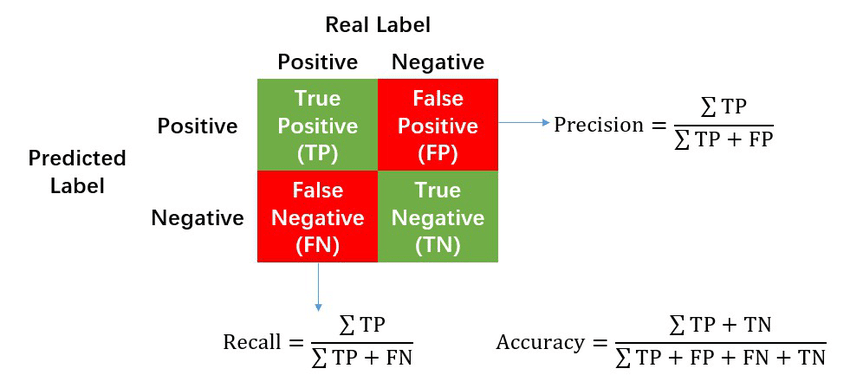

In [69]:
from sklearn.metrics import classification_report, confusion_matrix

In [70]:
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.99      0.93      0.96       504
                                 Apple___Black_rot       1.00      0.98      0.99       497
                          Apple___Cedar_apple_rust       0.99      0.97      0.98       440
                                   Apple___healthy       0.93      0.97      0.95       502
                               Blueberry___healthy       0.94      0.99      0.96       454
          Cherry_(including_sour)___Powdery_mildew       1.00      0.95      0.97       421
                 Cherry_(including_sour)___healthy       1.00      0.98      0.99       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.97      0.92      0.94       410
                       Corn_(maize)___Common_rust_       1.00      0.99      1.00       477
               Corn_(maize)___Northern_Leaf_Blight       0.93      0.98      0.

In [72]:
cm = confusion_matrix(Y_true,predicted_categories)
cm

array([[467,   2,   0, ...,   0,   0,   0],
       [  1, 486,   0, ...,   0,   0,   0],
       [  0,   0, 427, ...,   0,   1,   0],
       ...,
       [  0,   0,   0, ..., 487,   0,   0],
       [  0,   0,   0, ...,   0, 443,   0],
       [  0,   0,   0, ...,   0,   0, 473]], dtype=int64)

### Confusion Matrix Visualization

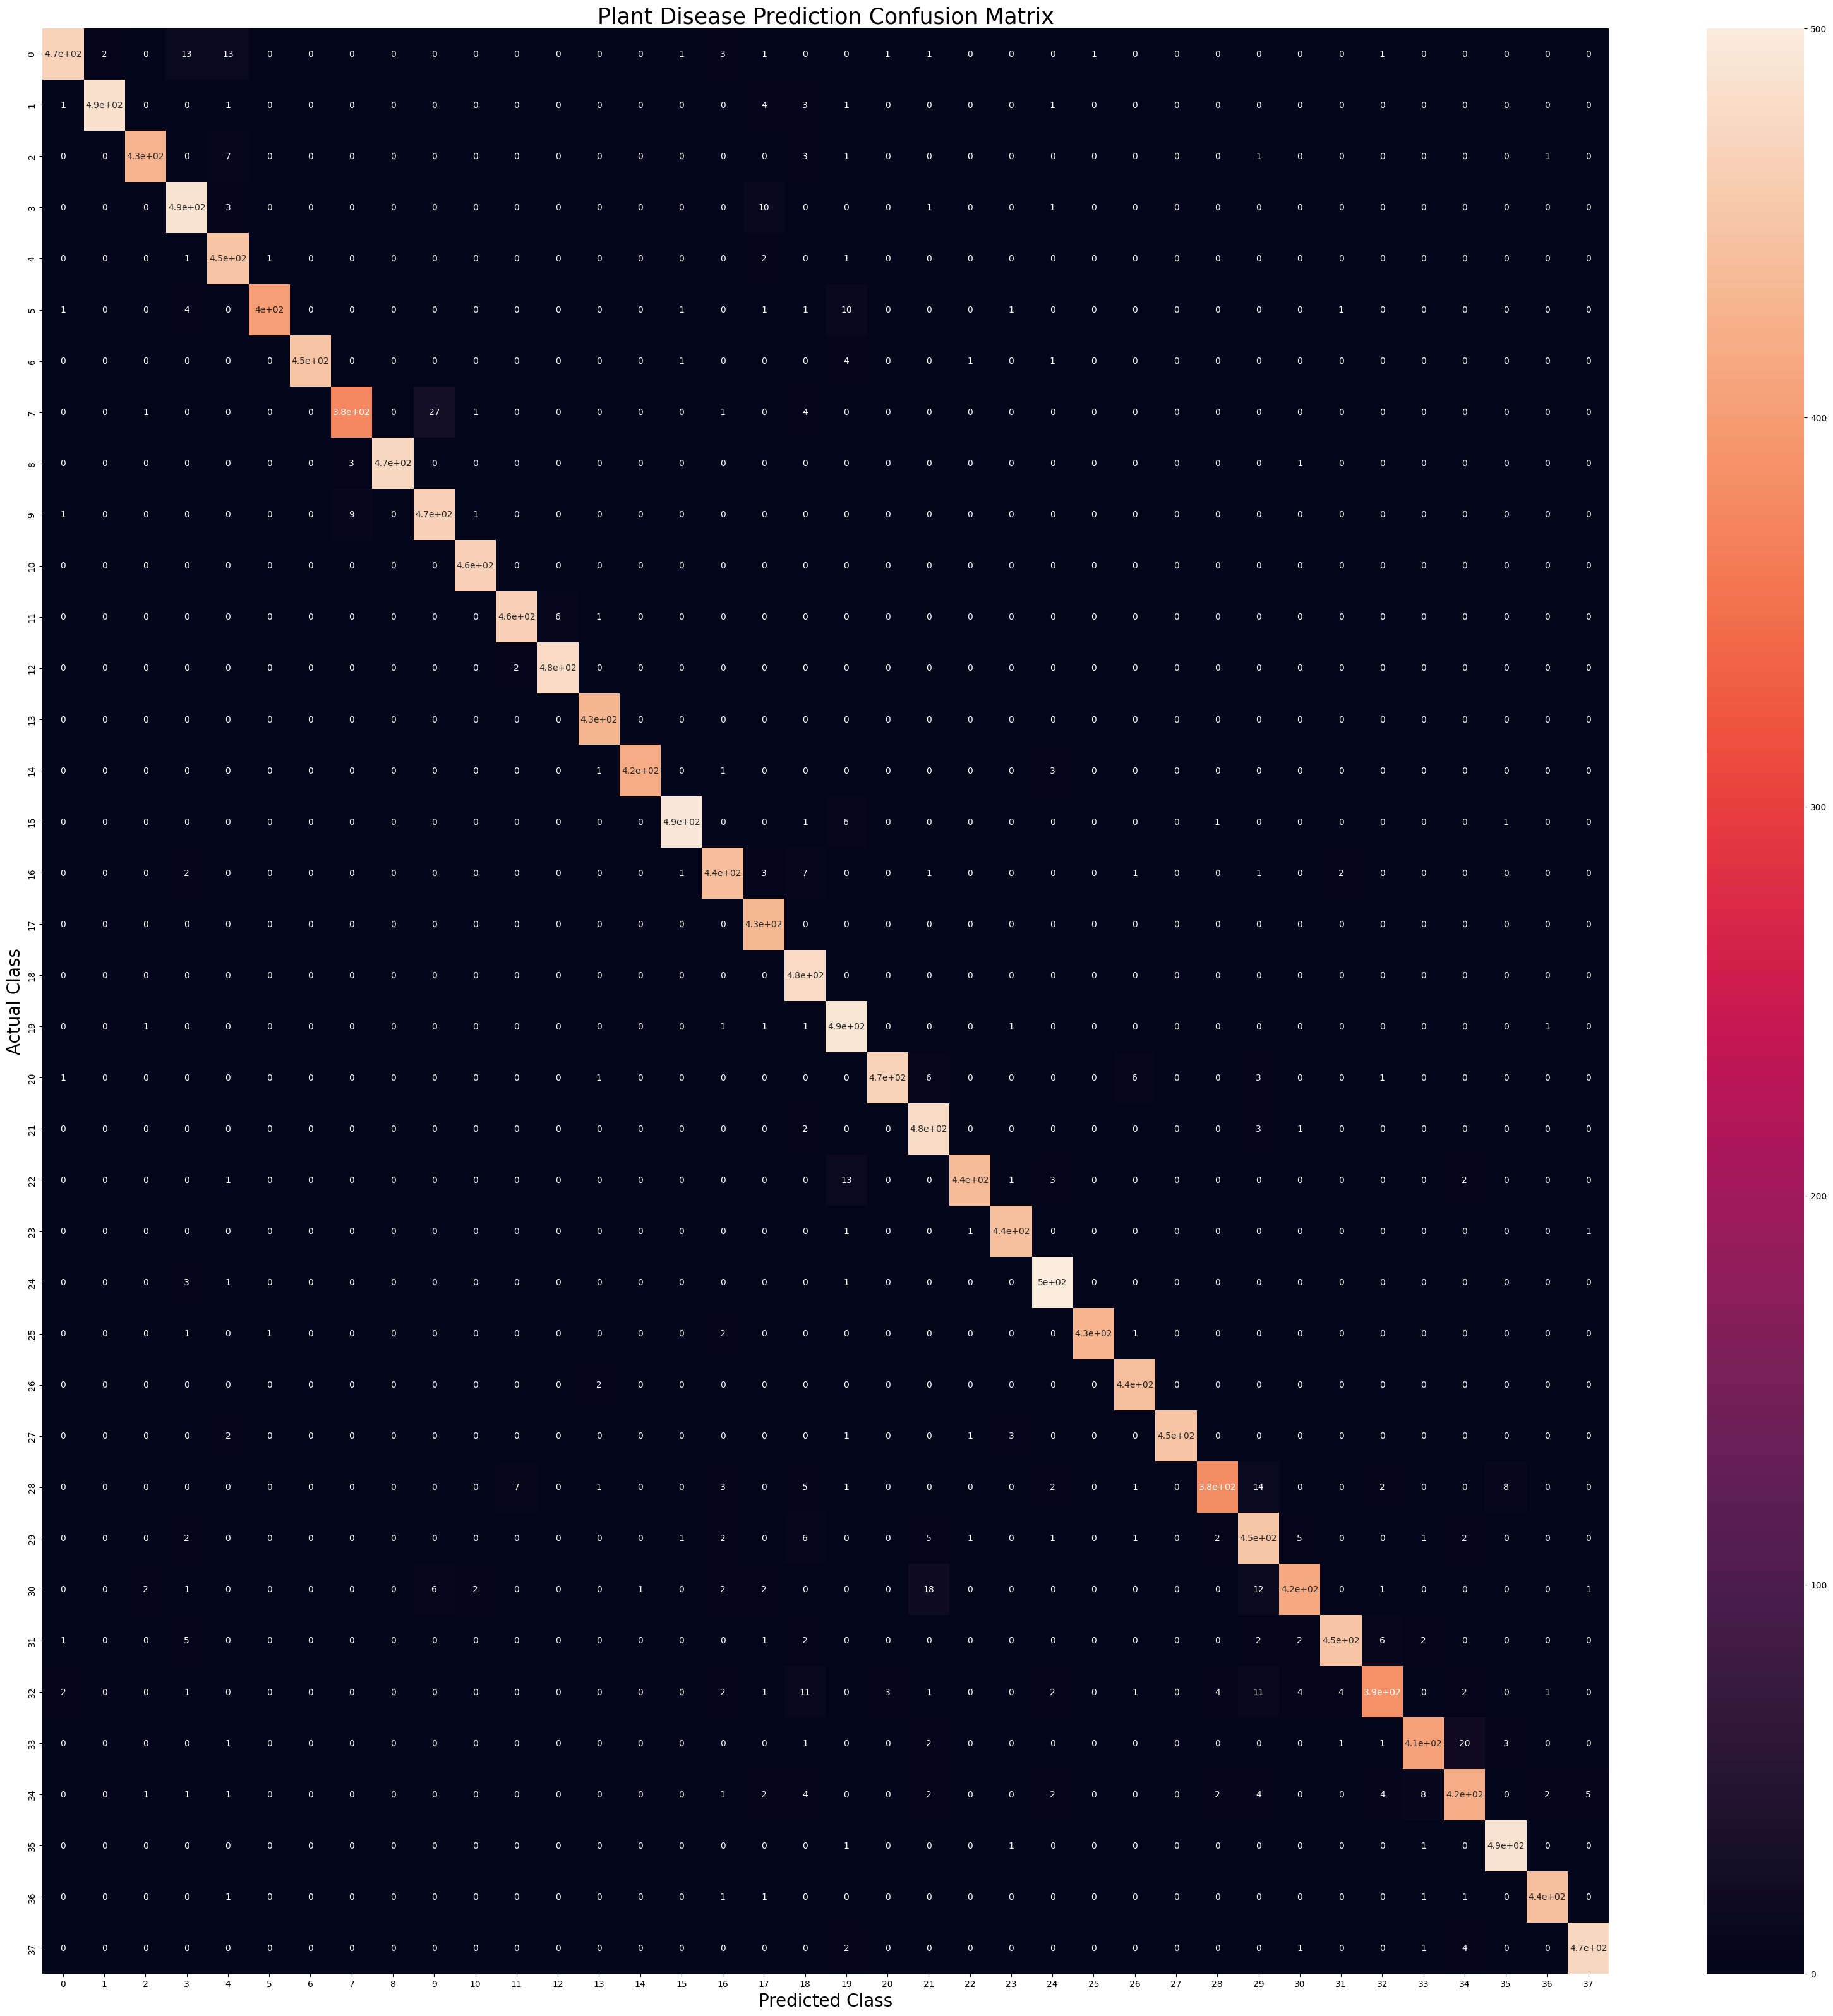

In [73]:
plt.figure(figsize=(40, 40))
sns.heatmap(cm,annot=True,annot_kws={"size": 10})

plt.xlabel('Predicted Class',fontsize = 20)
plt.ylabel('Actual Class',fontsize = 20)
plt.title('Plant Disease Prediction Confusion Matrix',fontsize = 25)
plt.show()